In [1]:
import numpy as np    # for linear algebra
import pandas as pd   # for data processing; Created by Wes McKinney at AQR (hedge fund)
import matplotlib.pyplot as plt

In [2]:
import datetime
start_date = datetime.date(2016, 1, 1)
end_date   = datetime.date.today()

#start_date = '2016-01-01'

#help(datetime.datetime)    # also has hh:mm:ss.mmmmmm, tzinfo

In [3]:
from pandas_datareader.data import DataReader    # pip install pandas-datareader

TICKER = 'AAPL'

df_stock = DataReader(TICKER, 'yahoo', start_date, end_date)    # http://finance.yahoo.com/quote/GS/history?p=GS
df_stock.tail()

#print(type(df_stock))    # DataFrame datatype
#?DataReader

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-17,141.000000,141.000000,139.889999,139.990005,43597400,139.990005
2017-03-20,140.399994,141.500000,140.229996,141.460007,20213100,141.460007
2017-03-21,142.110001,142.800003,139.729996,139.839996,39116800,139.839996
2017-03-22,139.850006,141.600006,139.759995,141.419998,25787600,141.419998
2017-03-23,141.259995,141.580002,140.610001,140.919998,20285700,140.919998


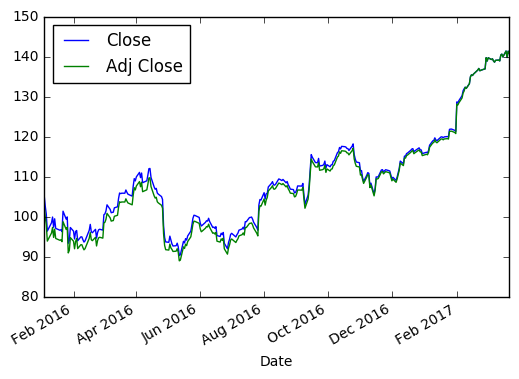

In [4]:
df_stock[['Close', 'Adj Close']].plot()
plt.show()

In [5]:
df_stock.describe()

,Open,High,Low,Close,Volume,Adj Close
count,308.000000,308.000000,308.000000,308.000000,3.080000e+02,308.000000
mean,109.169578,110.070227,108.420714,109.316104,3.644466e+07,108.082277
std,12.638701,12.583056,12.781184,12.728094,1.698057e+07,13.300686
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,98.545002,99.300003,97.334997,98.512499,2.589125e+07,96.760991
50%,107.890000,108.830002,107.200001,108.015000,3.186690e+07,106.839077
75%,115.439998,116.502500,114.815002,115.857500,4.128472e+07,115.234847
max,142.110001,142.800003,140.610001,141.460007,1.333697e+08,141.460007


In [6]:
df_stock.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.998347,0.998238,0.996562,-0.349969,0.995899
High,0.998347,1.000000,0.998017,0.998480,-0.331699,0.997540
Low,0.998238,0.998017,1.000000,0.998465,-0.368799,0.998075
Close,0.996562,0.998480,0.998465,1.000000,-0.351669,0.999290
Volume,-0.349969,-0.331699,-0.368799,-0.351669,1.000000,-0.359295
Adj Close,0.995899,0.997540,0.998075,0.999290,-0.359295,1.000000


In [7]:
#df_stock.to_csv('StockData/GS.csv')    # *.csv: Comma Separated Values

import os

# return csv file path given (ticker) symbol
def symbol_to_path(symbol, base_dir='StockData'):
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

df_stock.to_csv(symbol_to_path(TICKER))

In [8]:
df_csv = pd.read_csv(symbol_to_path(TICKER))
# After read_csv, the Date index becomes another column, and instead there is an integer index

df_csv.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,102.612183
1,2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.040792
2,2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.083025
3,2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,93.943473
4,2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.440222


In [9]:
df_AC = df_csv['Adj Close']
df_AC[0:10]

0    102.612183
1    100.040792
2     98.083025
3     93.943473
4     94.440222
5     95.969420
6     97.362258
7     94.859047
8     96.933690
9     94.605802
Name: Adj Close, dtype: float64

In [10]:
AC = df_csv['Adj Close'].values    # Eliminates the integer index

In [11]:
n = 20    # how many to look back
p = 5     # how many to look forward
m = len(AC) - n - p + 1    # num of usable sample sets

# Manually split tn:cv:tt = 0.6:0.2:0.2 (since we don't want to shuffle)
pct_tn = 0.6    # percentage of training data
pct_cv = 0.2    # percentage of cross validation data
m_tn = int(m * pct_tn)
m_cv = int(m * pct_cv)
m_tt = m - m_tn - m_cv

print(len(AC), m, m_tn, m_cv, m_tt)
# print(m_tn + n + p - 1)    # num to use for scaling

308 284 170 56 58


In [12]:
# Scaling to unit length: [0, 1]
# 이렇게 했더니 [0,1] scope를 벗어나면 Learning model이 엉망임
# 결론: [0,1] scaling은 그때그때의 dataset를 각각 해줘야 함...
#AC_tn = AC[:m_tn + n + p - 1]
#AC_tn_max = AC_tn.max(axis=0)
#AC_tn_min = AC_tn.min(axis=0)
#AC_sc = (AC - AC_tn_min) / (AC_tn_max - AC_tn_min)

from sklearn import preprocessing

# Standard Normalization
#sc = preprocessing.StandardScaler()
#print(sc)
#sc.fit(X_tn.reshape(-1,1))    # Fit using training set
#AC_sc = sc.transform(AC.reshape(-1,1))    # Transform all

In [13]:
X = np.zeros((m, n))
mMs = preprocessing.MinMaxScaler()
print(mMs)

# Note that i is defined as at the end of the trading day
for i in range(m):
    X[i] = AC[i:i+n]
    X[i] = mMs.fit_transform(X[i].reshape(-1, 1)).reshape(20)

y = np.where(AC[n+p-1:] > AC[n-1:-p], 1., 0.)    # datatype float

MinMaxScaler(copy=True, feature_range=(0, 1))


In [14]:
i = 107
print(X[i])
print(X[i][n-1])

[ 0.91852787  0.90670178  1.          0.89224706  0.69645129  0.71222039
  0.67017048  0.72404755  0.43232587  0.40210205  0.50854167  0.46123544
  0.5335081   0.17871229  0.          0.20367872  0.31011834  0.46780508
  0.50591305  0.38764733]
0.387647329333


In [15]:
y

array([ 0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1

In [16]:
X_tn = X[:m_tn]
y_tn = y[:m_tn]
X_cv = X[m_tn:m_tn+m_cv]
y_cv = y[m_tn:m_tn+m_cv]
X_tt = X[-m_tt:]
y_tt = y[-m_tt:]

#from sklearn.model_selection import train_test_split    # old version: from sklearn.cross_validation import train_test_split

# Split tn:tt = 0.7:0.3
# X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.3, random_state=27)

# Split tn:cv:tt = 0.6:0.2:0.2
#X_tn, X_temp, y_tn, y_temp = train_test_split(X, y, test_size=0.4, random_state=27)
#X_cv, X_tt, y_cv, y_tt = train_test_split(X_temp, y_temp, test_size=0.5, random_state=27)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')
print(clf_knn)

clf_knn.fit(X_tn, y_tn)

print(clf_knn.score(X_tn, y_tn))
print(clf_knn.score(X_cv, y_cv))
print(clf_knn.score(X_tt, y_tt))
print(clf_knn.predict(X_tt))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')
0.823529411765
0.535714285714
0.534482758621
[ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.]


In [18]:
# Comparing predict() vs predict_proba()
np.column_stack([clf_knn.predict(X_tt), clf_knn.predict_proba(X_tt)])

array([[ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.09090909,  0.90909091],
       [ 1.        ,  0.18181818,  0.81818182],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 0.        ,  0.81818182,  0.18181818],
       [ 0.        ,  0.90909091,  0.09090909],
       [ 0.        ,  0.90909091,  0.09090909],
       [ 0.        ,  0.81818182,  0.18181818],
       [ 0.        ,  0.81818182,  0.18181818],
       [ 0.        ,  0.81818182,  0.18181818],
       [ 0.        ,  0.90909091,  0.09090909],
       [ 1.        ,  0.45454545,  0.54545455],
       [ 1.        ,  0.36363636,  0.63636364],
       [ 0.        ,  0.54545455,  0.45454545],
       [ 0.        ,  0.54545455,  0.45454545],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.27272727,  0.72727273],
       [ 1.        ,  0.18181818,  0.81818182],
       [ 1.        ,  0.18181818,  0.81818182],
       [ 1.        ,  0.27272727,  0.727

In [19]:
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
print(clf_svm)

clf_svm.fit(X_tn, y_tn)
print(clf_svm.score(X_tn, y_tn))
print(clf_svm.score(X_cv, y_cv))
print(clf_svm.score(X_tt, y_tt))
print(clf_svm.predict(X_tt))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.758823529412
0.535714285714
0.5
[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.]


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_raf = RandomForestClassifier(n_estimators=50)

clf_raf.fit(X_tn, y_tn)
print(clf_raf.score(X_tn, y_tn))
print(clf_raf.score(X_cv, y_cv))
print(clf_raf.score(X_tt, y_tt))
print(clf_raf.predict(X_tt))

1.0
0.5
0.551724137931
[ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.]


In [21]:
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                              usecols=['Date', 'Adj Close'], na_values=['nan']) # NaN: Not a Number
        df_temp = df_temp.rename(columns={'Adj Close' : symbol})
        df = df.join(df_temp)
        #df = df.join(df_temp, how='inner')
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [22]:
symbols = ['GOOG','IBM','GLD']

if 'SPY' not in symbols:
    symbols.insert(0, 'SPY')

for symbol in symbols:
    df_temp = DataReader(symbol, "yahoo", start_date, end_date)
    df_temp.to_csv(symbol_to_path(symbol))

dates = pd.date_range(start_date, end_date)

In [23]:
df = get_data(symbols, dates)
df.tail()

,SPY,GOOG,IBM,GLD
2017-03-17,237.029999,852.119995,175.649994,116.989998
2017-03-20,236.770004,848.400024,175.699997,117.510002
2017-03-21,233.729996,830.460022,173.880005,118.540001
2017-03-22,234.279999,829.590027,174.779999,118.830002
2017-03-23,234.029999,817.580017,174.820007,118.669998
